We return to the death penalty.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

In this case, we are going to analyze whether people with higher incomes are more likely to favor the death penalty.

To do this, we are going to analyze the results from a sample of the
US [General Social Survey](http://www.gss.norc.org) from 2002.

If you are running on your laptop, download the data file [GSS2002.csv]({{ site.baseurl }}/data/GSS2002.csv).

In [2]:
# Read the data into a data frame
gss = pd.read_csv('GSS2002.csv')
gss

ID          Region  Gender   Race  Education        Marital  \
0        1   South Central  Female  White         HS       Divorced   
1        2   South Central    Male  White  Bachelors        Married   
2        3   South Central  Female  White         HS      Separated   
3        4   South Central  Female  White    Left HS       Divorced   
4        5   South Central    Male  White    Left HS       Divorced   
5        6   South Central    Male  White         HS       Divorced   
6        7   South Central  Female  White  Bachelors        Married   
7        8   South Central  Female  White         HS        Married   
8        9   South Central    Male  White         HS       Divorced   
9       10   South Central  Female  Other         HS  Never Married   
10      11   South Central    Male  White         HS        Married   
11      12   South Central    Male  White    Left HS        Married   
12      13   South Central    Male  Black   Graduate        Married   
13      14   South Central  Female  White         HS       Divorced   
14      15   South Central  Female  Other         HS        Married   
15      16   South Central  Female  White         HS        Married   
16      17   South Central  Female  White         HS       Divorced   
17      18   South Central    Male  White         HS  Never Married   
18      19   South Central    Male  White     Jr Col       Divorced   
19      20   South Central    Male  White         HS  Never Married   
20      21   South Central  Female  Black         HS  Never Married   
21      22   South Central    Male  Black         HS      Separated   
22      23   South Central    Male  Other  Bachelors        Married   
23      24   South Central  Female  Black         HS        Married   
24      25   South Central    Male  White         HS        Married   
25      26   South Central  Female  White         HS        Widowed   
26      27   South Central  Female  White         HS        Widowed   
27      28   South Central  Female  Other  Bachelors       Divorced   
28      29   South Central  Female  Other         HS  Never Married   
29      30   South Central  Female  White         HS  Never Married   
...    ...             ...     ...    ...        ...            ...   
2735  2736  South Atlantic    Male  White   Graduate        Married   
2736  2737  South Atlantic  Female  White  Bachelors        Married   
2737  2738  South Atlantic  Female  Black         HS        Married   
2738  2739  South Atlantic  Female  White         HS        Widowed   
2739  2740  South Atlantic  Female  White    Left HS      Separated   
2740  2741  South Atlantic  Female  White  Bachelors      Separated   
2741  2742  South Atlantic    Male  White         HS        Married   
2742  2743  South Atlantic    Male  White         HS  Never Married   
2743  2744  South Atlantic    Male  Black         HS        Married   
2744  2745  South Atlantic    Male  White         HS  Never Married   
2745  2746         Pacific  Female  White  Bachelors        Married   
2746  2747         Pacific  Female  White         HS        Widowed   
2747  2748         Pacific  Female  White         HS  Never Married   
2748  2749         Pacific  Female  White         HS        Widowed   
2749  2750         Mid-Atl    Male  White     Jr Col        Married   
2750  2751         Mid-Atl  Female  White         HS        Married   
2751  2752         Mid-Atl    Male  White    Left HS        Married   
2752  2753   South Central  Female  White     Jr Col        Married   
2753  2754   South Central    Male  Black         HS  Never Married   
2754  2755   South Central  Female  White         HS       Divorced   
2755  2756   South Central  Female  White         HS        Married   
2756  2757   South Central    Male  Black         HS        Married   
2757  2758        New Engl    Male  White         HS       Divorced   
2758  2759        New Engl  Female  White         HS  Never Married   
2759  2760        New Engl  Fema

Each row corresponds to a single respondent.

Show the column names:

In [3]:
gss.columns

Index(['ID', 'Region', 'Gender', 'Race', 'Education', 'Marital', 'Religion',
       'Happy', 'Income', 'PolParty', 'Politics', 'Marijuana', 'DeathPenalty',
       'OwnGun', 'GunLaw', 'SpendMilitary', 'SpendEduc', 'SpendEnv',
       'SpendSci', 'Pres00', 'Postlife'],
      dtype='object')

We want to work with only two columns from this data frame.  These are "Income", and "DeathPenalty".

"Income" gives the income bracket of the respondent.  "DeathPenalty" is the answer to a question about whether they "Favor" or "Oppose" the death penalty.

First make a list with the names of the columns that we want.

In [4]:
cols = ['Income', 'DeathPenalty']
cols

['Income', 'DeathPenalty']

Next make a new data frame by indexing the data frame with this list.

The new data frame has only the columns we selected.

In [5]:
money_death = gss[cols]
money_death

Income DeathPenalty
0       30000-34999        Favor
1       75000-89999        Favor
2       35000-39999          NaN
3       50000-59999          NaN
4       40000-49999          NaN
5       40000-49999        Favor
6               NaN          NaN
7               NaN          NaN
8       60000-74999        Favor
9        under 1000          NaN
10      50000-59999          NaN
11    110000-129999          NaN
12     90000-109999          NaN
13     10000-124999        Favor
14              NaN          NaN
15              NaN          NaN
16              NaN        Favor
17      40000-49999        Favor
18      75000-89999        Favor
19      25000-29999          NaN
20      25000-29999          NaN
21      17500-19999       Oppose
22      50000-59999        Favor
23      40000-49999          NaN
24      40000-49999          NaN
25              NaN          NaN
26              NaN        Favor
27      25000-29999          NaN
28        1000-2999          NaN
29     10000-124999          NaN
...             ...          ...
2735            NaN        Favor
2736    25000-29999          NaN
2737    60000-74999       Oppose
2738    25000-29999          NaN
2739            NaN          NaN
2740            NaN          NaN
2741    15000-17499        Favor
2742    25000-29999        Favor
2743    22500-24999          NaN
2744            NaN          NaN
2745            NaN        Favor
2746            NaN       Oppose
2747      8000-9999        Favor
2748            NaN          NaN
2749    22500-24999          NaN
2750      6000-6999          NaN
2751    22500-24999          NaN
2752            NaN          NaN
2753    35000-39999        Favor
2754            NaN          NaN
2755    35000-39999          NaN
2756    30000-34999        Favor
2757      6000-6999          NaN
2758    12500-14999          NaN
2759    20000-22499          NaN
2760    22500-24999        Favor
2761            NaN          NaN
2762            NaN          NaN
2763            NaN          NaN
2764    60000-74999       Oppose

[2765 rows x 2 columns]

There are many missing question responses, indicated by `NaN`.  To
make our life easier, we drop the respondents who didn't specify an
income bracket, and those who did not give an answer to the death penalty
question.  We use Pandas `dropna` method of the data frame, to drop all rows
that have any missing values in the row.

In [6]:
money_death = money_death.dropna()
money_death

Income DeathPenalty
0       30000-34999        Favor
1       75000-89999        Favor
5       40000-49999        Favor
8       60000-74999        Favor
13     10000-124999        Favor
17      40000-49999        Favor
18      75000-89999        Favor
21      17500-19999       Oppose
22      50000-59999        Favor
31      30000-34999        Favor
32      50000-59999       Oppose
33      75000-89999       Oppose
35       under 1000       Oppose
36        7000-7999       Oppose
37      60000-74999        Favor
42      30000-34999        Favor
45      35000-39999        Favor
46       under 1000        Favor
52      17500-19999        Favor
55      35000-39999        Favor
58        1000-2999        Favor
62      50000-59999        Favor
64      12500-14999        Favor
74    110000-129999       Oppose
77      75000-89999        Favor
78      35000-39999        Favor
81      30000-34999        Favor
92      20000-22499        Favor
93      60000-74999        Favor
95      60000-74999       Oppose
...             ...          ...
2671    75000-89999        Favor
2677      1000-2999       Oppose
2678    15000-17499        Favor
2684     under 1000        Favor
2689      3000-3999        Favor
2690    22500-24999       Oppose
2692      8000-9999        Favor
2696      3000-3999       Oppose
2697    30000-34999        Favor
2699    25000-29999        Favor
2702      8000-9999       Oppose
2706   10000-124999       Oppose
2709    12500-14999       Oppose
2714    12500-14999        Favor
2715    40000-49999        Favor
2716  130000-149999        Favor
2717      3000-3999       Oppose
2723    22500-24999        Favor
2725    40000-49999        Favor
2726    15000-17499       Oppose
2727    12500-14999        Favor
2729     under 1000        Favor
2737    60000-74999       Oppose
2741    15000-17499        Favor
2742    25000-29999        Favor
2747      8000-9999        Favor
2753    35000-39999        Favor
2756    30000-34999        Favor
2760    22500-24999        Favor
2764    60000-74999       Oppose

[904 rows x 2 columns]

Get the income column.

In [7]:
income = money_death['Income']

Show the unique values:

In [8]:
income.value_counts()

40000-49999      88
30000-34999      78
50000-59999      72
25000-29999      60
35000-39999      54
60000-74999      51
20000-22499      44
12500-14999      44
130000-149999    43
22500-24999      40
110000-129999    38
17500-19999      37
15000-17499      36
10000-124999     36
1000-2999        32
8000-9999        32
75000-89999      26
3000-3999        19
under 1000       17
5000-5999        16
4000-4999        13
90000-109999     11
7000-7999         9
6000-6999         8
Name: Income, dtype: int64

These are strings.  We want to get income as a number.  We estimate this by
*recoding* the "Income" column.  We replace the string, giving the income
bracket, with the average of the minimum and maximum in the range.

We can do this with a *recoder function*.  We have not covered functions yet, so do not worry about the details of this function.

In [9]:
def recode_income(value):
    if value == 'under 1000':
        return 500
    low_str, high_str = value.split('-')
    low, high = int(low_str), int(high_str)
    return np.mean([low, high])

Here is what the recoder function gives with the lowest income bracket.

In [10]:
recode_income('under 1000')

500

Here is the return from a higher bracket:

In [11]:
recode_income('90000-109999')

99999.5

Use this function to recode the "Income" strings into numbers. Again, we have not covered the `apply` method yet, so don't worry about the details.

In [12]:
income_ish = income.apply(recode_income)
income_ish

0        32499.5
1        82499.5
5        44999.5
8        67499.5
13       67499.5
17       44999.5
18       82499.5
21       18749.5
22       54999.5
31       32499.5
32       54999.5
33       82499.5
35         500.0
36        7499.5
37       67499.5
42       32499.5
45       37499.5
46         500.0
52       18749.5
55       37499.5
58        1999.5
62       54999.5
64       13749.5
74      119999.5
77       82499.5
78       37499.5
81       32499.5
92       21249.5
93       67499.5
95       67499.5
          ...   
2671     82499.5
2677      1999.5
2678     16249.5
2684       500.0
2689      3499.5
2690     23749.5
2692      8999.5
2696      3499.5
2697     32499.5
2699     27499.5
2702      8999.5
2706     67499.5
2709     13749.5
2714     13749.5
2715     44999.5
2716    139999.5
2717      3499.5
2723     23749.5
2725     44999.5
2726     16249.5
2727     13749.5
2729       500.0
2737     67499.5
2741     16249.5
2742     27499.5
2747      8999.5
2753     37499.5
2756     32499

Now get the results of the answer to the death penalty question.

In [13]:
death = money_death['DeathPenalty']
death.value_counts()

Favor     622
Oppose    282
Name: DeathPenalty, dtype: int64

We will identify the rows for respondents who are in favor of the death penalty.  To do this, we make a Boolean vector:

In [14]:
death == 'Favor'

0        True
1        True
5        True
8        True
13       True
17       True
18       True
21      False
22       True
31       True
32      False
33      False
35      False
36      False
37       True
42       True
45       True
46       True
52       True
55       True
58       True
62       True
64       True
74      False
77       True
78       True
81       True
92       True
93       True
95      False
        ...  
2671     True
2677    False
2678     True
2684     True
2689     True
2690    False
2692     True
2696    False
2697     True
2699     True
2702    False
2706    False
2709    False
2714     True
2715     True
2716     True
2717    False
2723     True
2725     True
2726    False
2727     True
2729     True
2737    False
2741     True
2742     True
2747     True
2753     True
2756     True
2760     True
2764    False
Name: DeathPenalty, Length: 904, dtype: bool

Use this vector to select the income values for the respondents in favor of the death penalty.  Show the distribution of values.

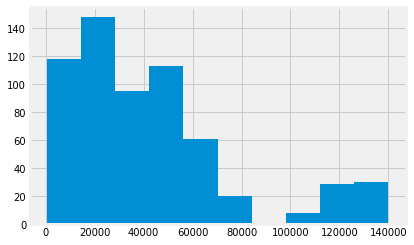

In [15]:
favor_income = income_ish[death == 'Favor']
favor_income.hist();

Likewise select incomes for those opposed.   Show the distribution.

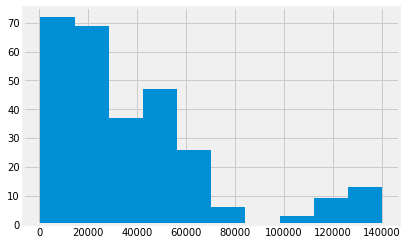

In [16]:
oppose_income = income_ish[death == 'Oppose']
oppose_income.hist();

Calculate the difference in mean income between the groups.  This is the difference we observe.

In [17]:
actual_diff = np.mean(favor_income) - np.mean(oppose_income)
actual_diff

4535.163012246019

We want to know whether this difference in income is compatible with random sampling. That is, we want to know whether a difference this large is plausible, if the incomes are in fact random samples from the same population.

To estimate how variable the mean differences can be, for such random sampling,
we simulate this sampling by pooling the income values that we have, from the
two groups, and the permuting them.

First, we get the number of respondents in favor of the death penalty.

In [18]:
n_favor = len(favor_income)
n_favor

622

Then we pool the in-favor and oppose groups.

In [19]:
pooled = np.append(favor_income, oppose_income)

To do the random sampling we permute the values, so the `pooled` vector is
a random mixture of the two groups.

In [20]:
np.random.shuffle(pooled)

Treat the first `n_favor` observations from this shuffled vector as
our simulated in-favor group.  The rest are our simulated oppose
group.

In [21]:
fake_favor = pooled[:n_favor]
fake_oppose = pooled[n_favor:]

Calculate the difference in means for this simulation.

In [22]:
fake_diff = np.mean(fake_favor) - np.mean(fake_oppose)
fake_diff

3143.6351793573704

Now it is your turn.   Do this simulation 10000 times, to build up the distribution of differences compatible with random sampling.

Use the [Brexit ages](../05/brexit_ages) notebook for inspiration.

In [23]:
differences = np.zeros(10000)
for i in np.arange(10000):
    # Permute the pooled incomes
    np.random.shuffle(pooled)
    # Make a fake favor sample

    # Make a fake opposed sample

    # Calculate the mean difference for the fake samples

    # Put the mean difference into the differences array.


When you have that working, do a histogram of the differences.

In [24]:
# Your code here

You can get an idea of where the actual difference we saw sits on this histogram, and therefore how likely that difference is, assuming the incomes come from the same underlying population of incomes.

To be more specific, count how many of the differences you calculated were greater than or equal to the actual difference.

In [25]:
# Your code here

Now calculate the proportion of these differences, to give an estimate of the probability of seeing a difference this large, if the incomes all come from the same underlying population:

In [26]:
# Your code here